# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas

import numpy as np
import pandas as pd

# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [2]:
# Run this code:

pokemon = pd.read_csv('../pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [3]:
# Your code here:
pokemon.head(4)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [4]:
# Your code here:
conteo_si_leg = list(pokemon[pokemon.Legendary == True].shape)[0]
conteo_no_leg = list(pokemon[pokemon.Legendary == False].shape)[0]
print('los pokemon legenadrios son:',conteo_si_leg ,'los pokemon no legendarios son:' ,conteo_no_leg)

los pokemon legenadrios son: 65 los pokemon no legendarios son: 735


Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [5]:
# Your code here:

pokemon_legendario = pokemon[pokemon.Legendary == True]
pokemon_no_legendario = pokemon[pokemon.Legendary == False]

In [6]:
mean_pokemon_legendario = pokemon_legendario.Total.mean()
std_pokemon_legendario = pokemon_legendario.Total.std()

print('mean poke legendario',mean_pokemon_legendario,'std poke legendario' ,std_pokemon_legendario)

mean poke legendario 637.3846153846154 std poke legendario 60.93738905315346


In [7]:
pokemon_no_legendario.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,353.315646,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354
std,208.590419,106.760417,24.808849,30.490153,30.408194,29.091705,25.669310,27.843038,1.673471
min,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,175.500000,324.000000,50.000000,54.500000,50.000000,45.000000,50.000000,45.000000,2.000000
50%,346.000000,425.000000,65.000000,72.000000,66.000000,65.000000,65.000000,64.000000,3.000000
75%,533.500000,498.000000,79.500000,95.000000,85.000000,85.000000,85.000000,85.000000,5.000000
max,715.000000,700.000000,255.000000,185.000000,230.000000,175.000000,230.000000,160.000000,6.000000


In [8]:
mean_pokemon_no_legendario = pokemon_no_legendario.Total.mean()
std_pokemon_no_legendario = pokemon_no_legendario.Total.std()

print('mean poke no legendario',mean_pokemon_no_legendario,'std poke no legendario' ,std_pokemon_no_legendario)

mean poke no legendario 417.21360544217686 std poke no legendario 106.76041745713022


The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [9]:
# Your code here:
import numpy as np
from scipy import stats

stats.ttest_ind(pokemon_legendario.Total, pokemon_no_legendario.Total, axis=0, equal_var=False)


Ttest_indResult(statistic=25.8335743895517, pvalue=9.357954335957446e-47)

In [10]:
stats.ttest_ind(pokemon_legendario.Total, pokemon_legendario.Total, axis=0, equal_var=False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [11]:
pokemon_legendario.Total

156    580
157    580
158    580
162    680
163    780
      ... 
795    600
796    700
797    600
798    680
799    600
Name: Total, Length: 65, dtype: int64

In [12]:
pokemon_no_legendario.Total

0      318
1      405
2      525
3      625
4      309
      ... 
787    494
788    304
789    514
790    245
791    535
Name: Total, Length: 735, dtype: int64

What do you conclude from this test? Write your conclusions below.

# Your conclusions here:
# QUE AMBAS DATA FRAME, SON DIFENTES TOTALMENTE, TANTO EN MEDIA COMO LA VARIANZA


How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [13]:
# Your code here:

pokemon['Type1_count'] = pokemon.groupby('Type 1').cumcount()

In [14]:
pokemon_pivot = pokemon.pivot(index='Type1_count', columns='Type 1', values='Type1_count')

In [15]:
pokemon_pivot.columns = ['TYPE_1_'+str(x) for x in pokemon_pivot.columns.values]
pokemon_pivot.head(800)

,TYPE_1_Bug,TYPE_1_Dark,TYPE_1_Dragon,TYPE_1_Electric,TYPE_1_Fairy,TYPE_1_Fighting,TYPE_1_Fire,TYPE_1_Flying,TYPE_1_Ghost,TYPE_1_Grass,TYPE_1_Ground,TYPE_1_Ice,TYPE_1_Normal,TYPE_1_Poison,TYPE_1_Psychic,TYPE_1_Rock,TYPE_1_Steel,TYPE_1_Water
Type1_count,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0


In [16]:
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [17]:
# Your code here:
pokemon['Type1_count']


0       0
1       1
2       2
3       3
4       0
       ..
795    42
796    43
797    55
798    56
799    51
Name: Type1_count, Length: 800, dtype: int64

In [22]:
pokemon.groupby('Type 1').mean().Total

Type 1
Bug         378.927536
Dark        445.741935
Dragon      550.531250
Electric    443.409091
Fairy       413.176471
Fighting    416.444444
Fire        458.076923
Flying      485.000000
Ghost       439.562500
Grass       421.142857
Ground      437.500000
Ice         433.458333
Normal      401.683673
Poison      399.142857
Psychic     475.947368
Rock        453.750000
Steel       487.703704
Water       430.455357
Name: Total, dtype: float64

In [23]:
pokemon.groupby('Type 1').std().Total

Type 1
Bug         117.875223
Dark        109.126217
Dragon      146.267538
Electric    105.721952
Fairy       123.781680
Fighting    102.464378
Fire        109.760496
Flying      161.400124
Ghost       110.072685
Grass       106.650626
Ground      123.913081
Ice         108.281027
Normal      115.733038
Poison       92.358687
Psychic     139.026645
Rock        108.059227
Steel       115.420907
Water       113.188266
Name: Total, dtype: float64

In [28]:
pokemon[pokemon['Type 1'] == 'Bug'].Total.mean()

378.92753623188406

In [29]:
pokemon[pokemon['Type 1'] == 'Bug'].Total.std()

117.8752230165166

Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [53]:
# Your code here:
mean_water = pokemon[pokemon['Type 1'] == 'Water'].Total.mean()
mean_no_water = pokemon[pokemon['Type 1'] != 'Water'].Total.mean()

mean_no_water
mean_water


430.45535714285717

In [36]:
stats.ttest_ind(mean_water, mean_no_water, equal_var = True)

C:\Users\sistemas\AppData\Local\Temp\ipykernel_6036\489948909.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats.ttest_ind(mean_water, mean_no_water, equal_var = True)
C:\Users\sistemas\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\sistemas\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


Ttest_indResult(statistic=nan, pvalue=nan)

In [50]:
stats.ttest_ind(pokemon[pokemon['Type 1'] == 'Water'].Total, pokemon[pokemon['Type 1'] != 'Water'].Total, equal_var = True)

Ttest_indResult(statistic=-0.4418547448849676, pvalue=0.6587140317488793)

In [51]:
stats.ttest_ind(pokemon[pokemon['Type 1'] != 'Water'].Total,pokemon[pokemon['Type 1'] == 'Water'].Total,  equal_var = True)

Ttest_indResult(statistic=0.4418547448849676, pvalue=0.6587140317488793)

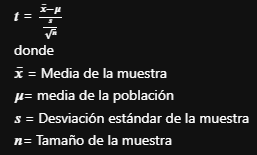


In [58]:
media_muetras = mean_water
meadia_poblacion = mean_no_water

In [59]:
desviacion_muestra = pokemon[pokemon['Type 1'] == 'Water'].Total.std()
tamaño_muestra = len(pokemon[pokemon['Type 1'] == 'Water'])
tamaño_muestra

112

In [63]:
(media_muetras - meadia_poblacion) / (desviacion_muestra / (tamaño_muestra**0.5))

-0.5052370333241799

In [61]:
desviacion_muestra

113.18826606431458

In [62]:
pokemon[pokemon['Type 1'] == 'Water'].Total.std()

113.18826606431458

Write your conclusion below.

In [10]:
# Your conclusions here:



# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [65]:
# Your code here:

pokemon.Attack
pokemon.Defense

0       49
1       62
2       82
3      100
4       52
      ... 
795    100
796    160
797    110
798    160
799    110
Name: Attack, Length: 800, dtype: int64

C:\Users\sistemas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sistemas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


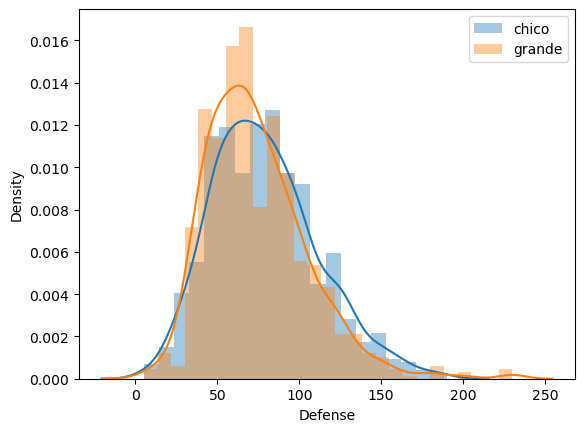

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(pokemon.Attack, label = 'chico')
sns.distplot(pokemon.Defense, label = 'grande')
plt.legend()

In [70]:
stats.ttest_rel(pokemon.Attack, pokemon.Defense)

Ttest_relResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

In [ ]:
Podemos rechazar la hipotesis nula de que no hay relacion y concluir que hay cierto nivel de dependencia

In [76]:
stats.ttest_rel(pokemon.Attack, pokemon.HP)

Ttest_relResult(statistic=8.690684444172424, pvalue=2.021361065920915e-17)

In [72]:
pokemon.Attack.mean()

79.00125

In [73]:
pokemon.Defense.mean()

73.8425

Describe the results of the test in the cell below.

# Your conclusions here:

# Podemos rechazar la hipotesis nula de que no hay relacion y concluir que hay cierto nivel de dependencia

We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [83]:
# Your code here:
stats.ttest_1samp(pokemon['Sp. Atk'], pokemon['Sp. Def'].mean())

Ttest_1sampResult(statistic=0.7930623304000574, pvalue=0.42797693754422494)

In [84]:
pokemon['Sp. Atk'].mean()

72.82

In [85]:
pokemon['Sp. Def'].mean()

71.9025

In [86]:
stats.ttest_rel(pokemon['Sp. Atk'], pokemon['Sp. Def'])

Ttest_relResult(statistic=0.853986188453353, pvalue=0.3933685997548122)

C:\Users\sistemas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sistemas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


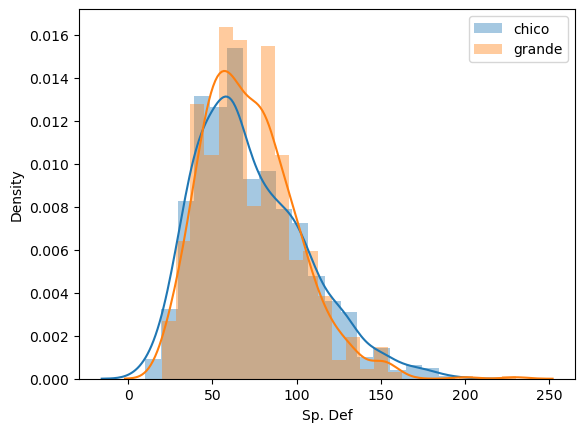

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(pokemon['Sp. Atk'], label = 'chico')
sns.distplot(pokemon['Sp. Def'], label = 'grande')
plt.legend()

Describe the results of the test in the cell below.

# Your conclusions here:
# No podemos rechazar la hipotesis nula de que no hay relacion y concluir que hay cierto nivel de similitud


As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [16]:
# Your code here:
    
    

In [88]:
stats.ttest_rel(pokemon.Defense, pokemon.Attack)

Ttest_relResult(statistic=-4.325566393330478, pvalue=1.7140303479358558e-05)

In [89]:
stats.ttest_rel(pokemon.Attack, pokemon.Defense)

Ttest_relResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

In [90]:
stats.ttest_1samp(pokemon.Defense, pokemon.Attack.mean())

Ttest_1sampResult(statistic=-4.679124590910434, pvalue=3.3829080435248473e-06)

In [91]:
stats.ttest_1samp(pokemon.Attack, pokemon.Defense.mean())

Ttest_1sampResult(statistic=4.4954813919438585, pvalue=7.967950832362132e-06)

# podemos concluir que no ahi similitud entre las medias de las columnas de denfensa y ataque

In [92]:
stats.ttest_1samp(pokemon.Attack, pokemon.Attack.mean())

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [93]:
# Your code here:
import pandas as pd




In [102]:
pd.crosstab(pokemon.Legendary, pokemon['Type 1'])

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Legendary,,,,,,,,,,,,,,,,,,
False,69,29,20,40,16,27,47,2,30,67,28,22,96,28,43,40,23,108
True,0,2,12,4,1,0,5,2,2,3,4,2,2,0,14,4,4,4


In [105]:
pd.crosstab(pokemon.Legendary, pokemon['Type 1'])['Water']

Legendary
False    108
True       4
Name: Water, dtype: int64

In [106]:
tabla_contigencia = pd.crosstab(pokemon.Legendary, pokemon['Type 1'])

Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

In [108]:
# Your code here:
import numpy as np
from scipy.stats import chi2_contingency


In [109]:
res = chi2_contingency(tabla_contigencia)

In [111]:
res

(90.4204913058596,
 5.118547414721704e-12,
 17,
 array([[ 63.39375,  28.48125,  29.4    ,  40.425  ,  15.61875,  24.80625,
          47.775  ,   3.675  ,  29.4    ,  64.3125 ,  29.4    ,  22.05   ,
          90.0375 ,  25.725  ,  52.36875,  40.425  ,  24.80625, 102.9    ],
        [  5.60625,   2.51875,   2.6    ,   3.575  ,   1.38125,   2.19375,
           4.225  ,   0.325  ,   2.6    ,   5.6875 ,   2.6    ,   1.95   ,
           7.9625 ,   2.275  ,   4.63125,   3.575  ,   2.19375,   9.1    ]]))

In [121]:
tabla_contingencia_2 = pd.crosstab(pokemon.Legendary, pokemon['Type 1'])['Water']

In [124]:
res_2 = chi2_contingency(tabla_contingencia_2)
res_2

(0.0, 1.0, 0, array([108.,   4.]))

Based on a 95% confidence, should we reject the null hypothesis?

In [19]:
# Your answer here:

